In [33]:
# # => load file lain
# from ipynb.fs.full.class_akuisisi_data import *
# from ipynb.fs.full.class_praproses_data import *
# from ipynb.fs.full.class_visualisasi_data import *

In [34]:
# pustaka untuk manipulasi data
import pandas as pd
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
from pandas import read_excel
import numpy as np
from numpy import concatenate

# Pustaka untuk visualisasi data
import seaborn as sns # Visualization
from matplotlib import pyplot
from matplotlib import pyplot as plt

In [35]:
# => proses membaca dataset
df = pd.read_excel("dataset/dataset.xlsx")

# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tanggal         240 non-null    datetime64[ns]
 1   sst             240 non-null    float64       
 2   soi             240 non-null    float64       
 3   oni             240 non-null    float64       
 4   curah_hujan     240 non-null    float64       
 5   hotspot_sumsel  240 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.4 KB


In [36]:
df.head()

,tanggal,sst,soi,oni,curah_hujan,hotspot_sumsel
0,2001-01-31,-0.76,1.0,-0.68,418.600006,3
1,2001-02-28,-0.56,1.7,-0.52,295.399994,5
2,2001-03-31,-0.37,0.9,-0.44,360.600006,10
3,2001-04-30,-0.56,0.2,-0.34,403.700012,20
4,2001-05-31,-0.46,-0.5,-0.25,116.900002,39


In [37]:
df = df[["hotspot_sumsel", "curah_hujan", "sst", "soi"]]

In [38]:
df.head()

,hotspot_sumsel,curah_hujan,sst,soi
0,3,418.600006,-0.76,1.0
1,5,295.399994,-0.56,1.7
2,10,360.600006,-0.37,0.9
3,20,403.700012,-0.56,0.2
4,39,116.900002,-0.46,-0.5


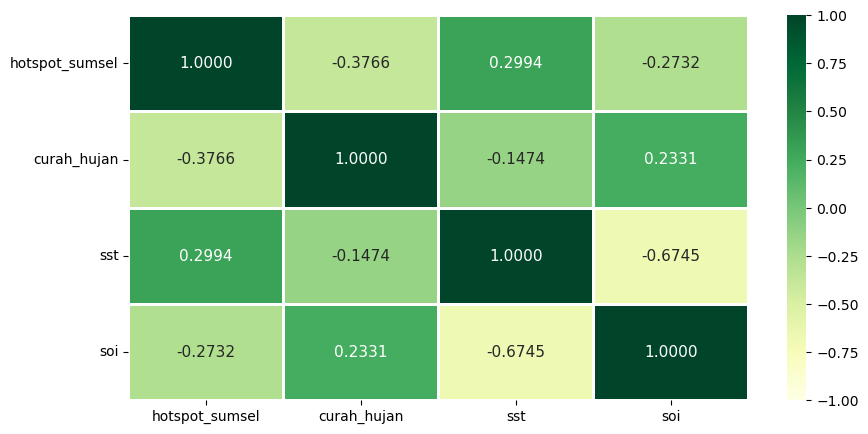

In [39]:
# membuat perhitungan korelasi terlebih dahulu
df_corr = df.corr(method="pearson")

# membuat frame heatmap
fig,ax = plt.subplots(figsize=(10,5))

# proses visual heatmap
# => pilihan warna lain untuk visual heatmap (coolwarm, Blues, RdYlGn_r, viridis, YlGnBu)
sns.heatmap(df_corr, cmap="YlGn", vmax=1, vmin=-1, annot=True, annot_kws={"fontsize":11}, linewidths=1, fmt='.4f', ax=ax)

# Menampilkan hasil visualisasi
plt.show()

In [40]:
# # menampilkan visualisa heatmap menggunakan korelasi pearson
# visual_heatmap(df.iloc[:, 1:], "pearson")

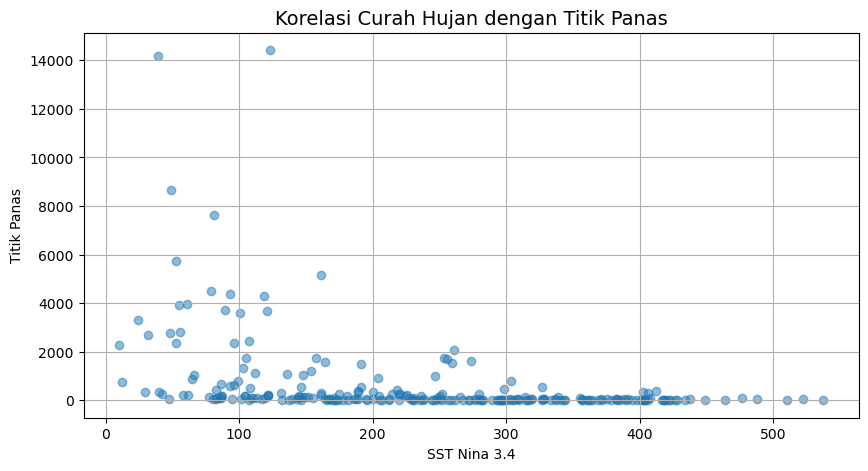

In [41]:
# membuat frame scatter plot
fig, ax = plt.subplots(figsize = (10,5))

# membuat scatter plot
ax.scatter(df["curah_hujan"], df["hotspot_sumsel"], color="tab:blue", linewidth=1, alpha=0.5)

# membuat label-label
ax.set_title("Korelasi Curah Hujan dengan Titik Panas", fontsize=14)
ax.set_xlabel("SST Nina 3.4", fontsize=10)
ax.set_ylabel("Titik Panas", fontsize=10)
ax.grid(True)

# Menampilkan Hasil Visualisasi
plt.show()

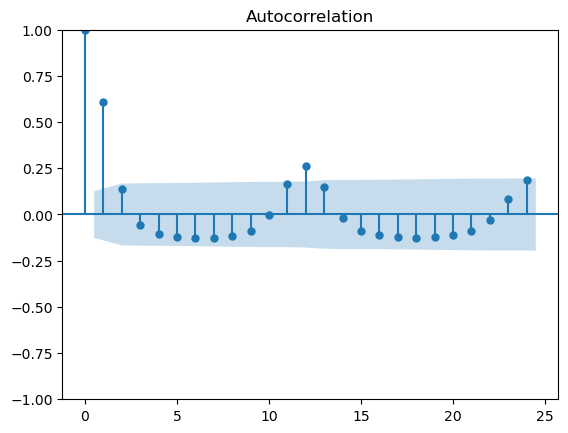

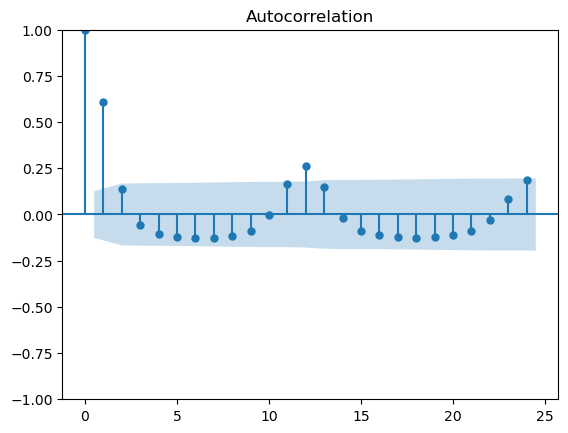

In [42]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['hotspot_sumsel'], lags=24, alpha=0.05)